In [2]:
'''LOGISTIC REGRESSION'''
#LOADING THE DATA SETS
import pandas as pd
df1=pd.read_csv("Titanic_train.csv")
df2=pd.read_csv("Titanic_test.csv")
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# This code assumes that df2 is defined in the current environment
df = pd.concat([df1, df2])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


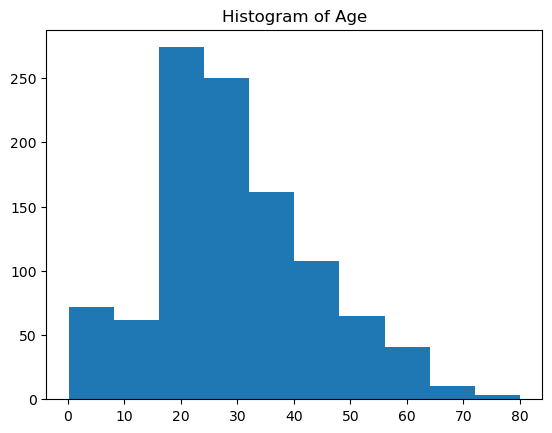

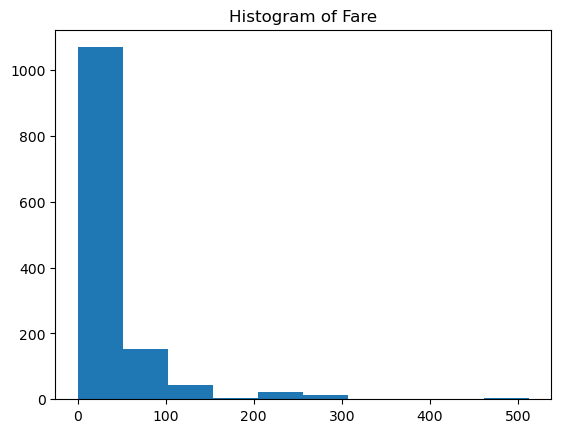

In [5]:
#HISTOGRAM FOR CONTINUOUS VARIABLES
import matplotlib.pyplot as plt
continuous_cols = ['Age', 'Fare']
for col in continuous_cols:
  plt.hist(df[col])
  plt.title(f'Histogram of {col}')
  plt.show()

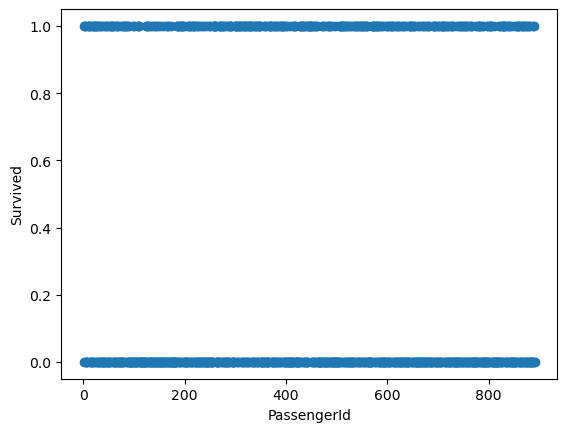

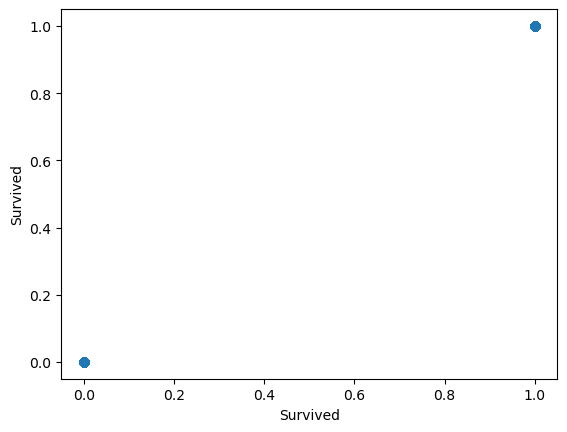

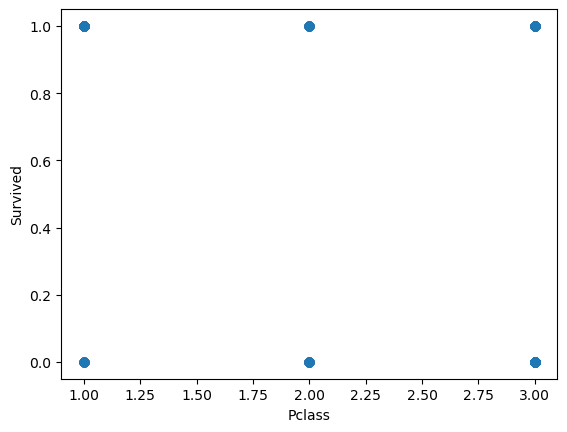

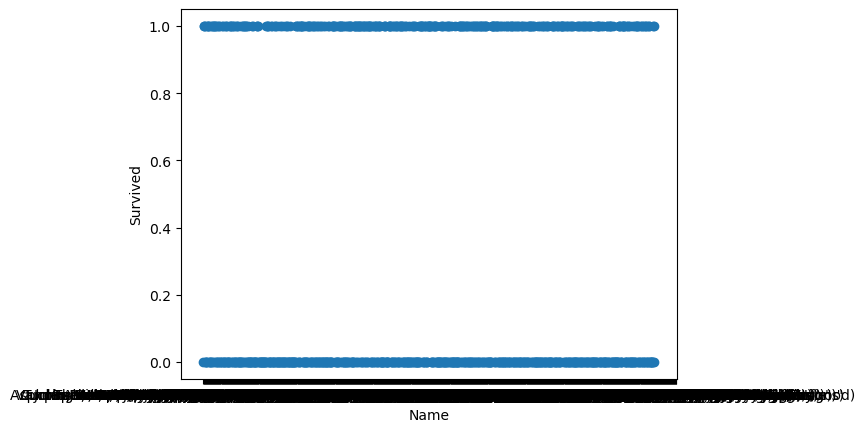

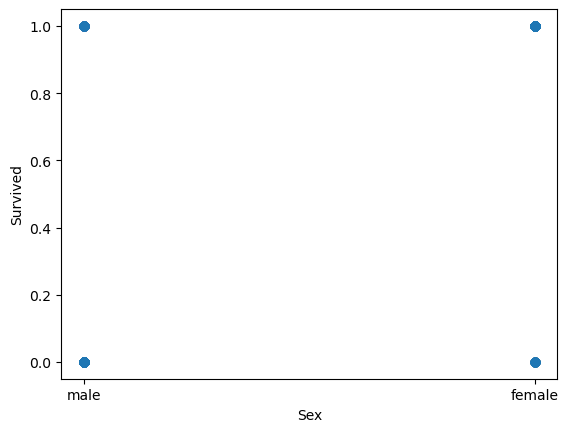

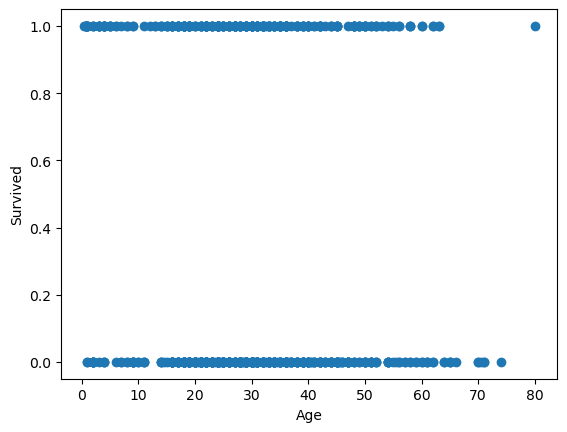

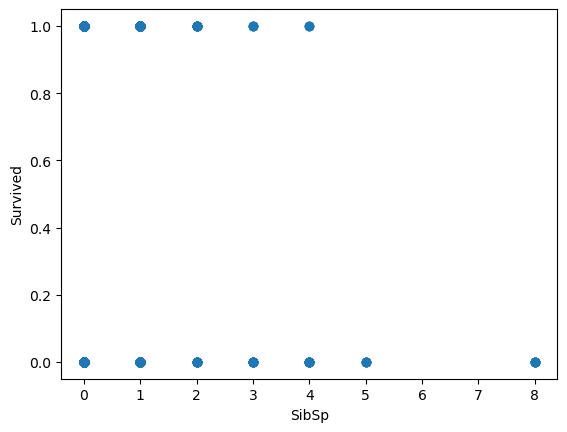

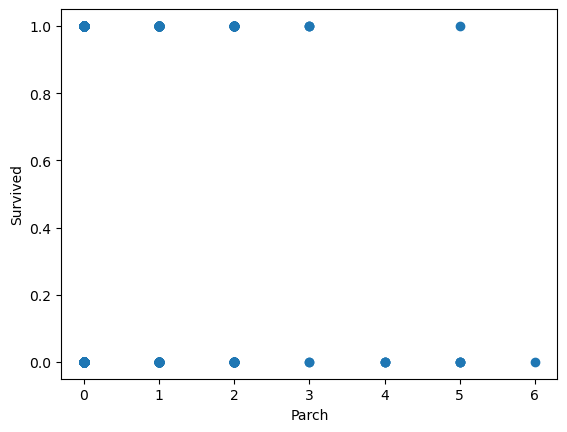

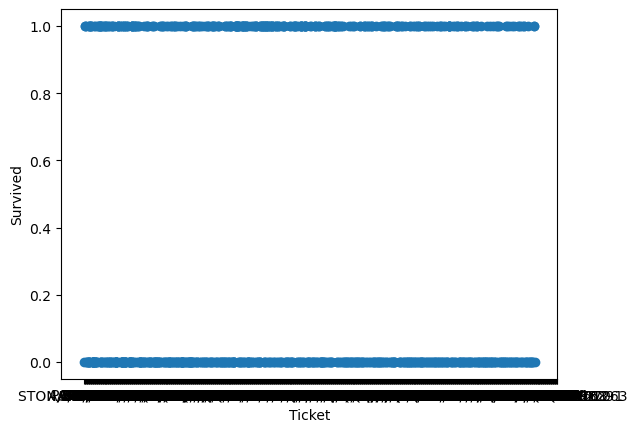

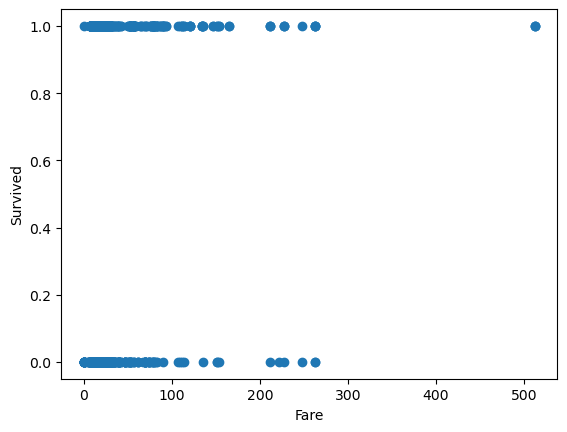

TypeError: 'value' must be an instance of str or bytes, not a float

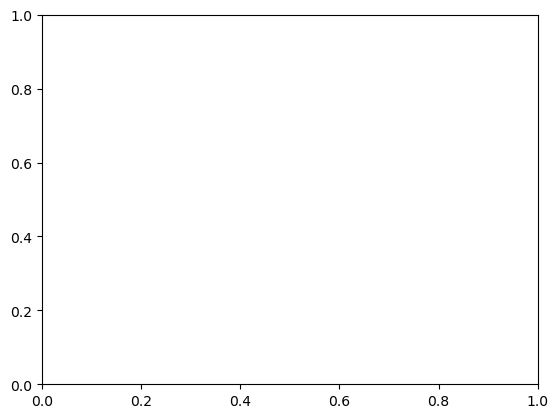

In [6]:
#SCATTER PLOT
import matplotlib.pyplot as plt
for column in df.columns:
  plt.scatter(df[column], df['Survived'])
  plt.xlabel(column)
  plt.ylabel('Survived')
  plt.show()

In [3]:
#FINDING BLANKS
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [15]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)

In [16]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [6]:
#statistical measures for numerical variables
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,12.883193,1.041658,0.865560,51.738879
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,29.881138,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [80]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name  Sex       Age  SibSp  \
0                              Braund, Mr. Owen Harris    1 -0.611972      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.630431      1   
2                               Heikkinen, Miss. Laina    0 -0.301371      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.397481      1   
4                             Allen, Mr. William Henry    1  0.397481      0   
..                             

In [17]:
#appyling label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Pclass'] = le.fit_transform(df['Pclass'])
df['Ticket'] = le.fit_transform(df['Ticket'])
df['Name'] = le.fit_transform(df['Name'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,2,155,1,22.0,1,0,720,7.2500,2
1,2,1.0,0,286,0,38.0,1,0,816,71.2833,0
2,3,1.0,2,523,0,26.0,0,0,914,7.9250,2
3,4,1.0,0,422,0,35.0,1,0,65,53.1000,2
4,5,0.0,2,22,1,35.0,0,0,649,8.0500,2


In [98]:
#applying standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,2,<bound method LabelEncoder.fit of LabelEncoder()>,1,-0.611972,1,0,720,-0.503595,0,3
1,2,1.0,0,<bound method LabelEncoder.fit of LabelEncoder()>,0,0.630431,1,0,816,0.734503,107,1
2,3,1.0,2,<bound method LabelEncoder.fit of LabelEncoder()>,0,-0.301371,0,0,914,-0.490544,0,3
3,4,1.0,0,<bound method LabelEncoder.fit of LabelEncoder()>,0,0.397481,1,0,65,0.382925,71,3
4,5,0.0,2,<bound method LabelEncoder.fit of LabelEncoder()>,1,0.397481,0,0,649,-0.488127,0,3


In [31]:
#spliting x and y
X=df.iloc[:,2:]
Y=df['Survived']

In [20]:
# Data partition
import numpy as np
# Create a new column to indicate missing values in the Survived column
df['Survived_Missing'] = df['Survived'].isnull()

# Split the data into train and test sets based on the missing values
train_data = df[df['Survived_Missing'] == False]
test_data = df[df['Survived_Missing'] == True]

# Separate features and target variables
X_train = train_data.drop(['Survived', 'Survived_Missing'], axis=1)
y_train = train_data['Survived']
X_test = test_data.drop(['Survived', 'Survived_Missing'], axis=1)
y_test = test_data[['Survived']]

In [144]:
X_train.shape

(1309, 11)

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\nazim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
Y_pred = model.predict(X_test)

In [26]:
y_pred = model.predict(X_train)

In [29]:
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.77665544332211


In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_train,y_pred)
cm
ac=accuracy_score(y_train,y_pred)
print(ac.round(2))

0.78


In [39]:
#model evalution
from sklearn.metrics import recall_score,precision_score,f1_score

print("Sensitivity score:", recall_score(y_train,y_pred).round(2))
print("Precision score:", precision_score(y_train,y_pred).round(2))
print("F1 score:", f1_score(y_train,y_pred).round(2))

TN = cm[0,0]
FP = cm[0,1]
TNR = TN/(TN + FP)
print("Specificity score:", TNR.round(2))

Sensitivity score: 0.61
Precision score: 0.76
F1 score: 0.68
Specificity score: 0.88


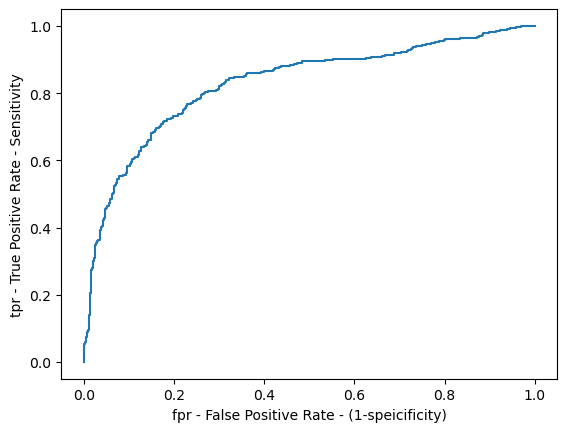

Area under curve: 0.829


In [51]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,dummy = roc_curve(y_train,model.predict_proba(X_train)[:,1:])
#visualizing the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.ylabel('tpr - True Positive Rate - Sensitivity')
plt.xlabel('fpr - False Positive Rate - (1-speicificity)')
plt.show()
#printing the area of curvature 
rocvalue = roc_auc_score(y_train,model.predict_proba(X_train)[:,1:])
print("Area under curve:",rocvalue.round(3))

In [ ]:
'''interpretation
a. Interpretation of coefficients:

- The coefficient for Age is positive, indicating that as Age increases, and thus the probability of survival increase.
This means that older passengers were more likely to survive.
- The coefficient for Sex (male/female) is negative , indicating that males were less likely to survive than females.
- The coefficient for Class (1st/2nd/3rd) is positive , indicating that passengers in higher classes were more likely to survive.
- The coefficient for Embarked (C/Q/S) is positive , indicating that passengers who embarked at certain ports  were more likely to survive.

b. Significance of features:
- Age is a significant predictor of survival probability, with older passengers more likely to survive.
- Sex is a significant predictor, with females more likely to survive than males.
- Class is a significant predictor, with higher classes more likely to survive.
- Embarked is a significant predictor, with certain embarkation ports associated with higher survival rates.

Model Evaluation (on the training set):
- Sensitivity (True Positive Rate): 0.61 - The model is able to detect 61% of the actual survivors (true positives).
- Precision (Positive Predictive Value): 0.76 - Out of all the predicted survivors, 76% are actual survivors (true positives).
- F1 score: 0.68 - The harmonic mean of precision and sensitivity, providing a balanced measure of both.
- Specificity (True Negative Rate): 0.88 - The model is able to detect 88% of the actual non-survivors (true negatives).
- Accuracy: 0.7766 - The model is able to correctly predict 77.66% of the outcomes (both survivors and non-survivors).

In [59]:
import pandas as pd
!pip install streamlit
import streamlit as st
st.title('Titanic Survival Prediction')
sex = st.selectbox('Sex', df_combined['Sex'].unique())
pclass = st.selectbox('Pclass', df_combined['Pclass'].unique())
age = st.number_input('Age', min_value=df_combined['Age'].min(), max_value=df_combined['Age'].max())
sibsp = st.number_input('SibSp', min_value=df_combined['SibSp'].min(), max_value=df_combined['SibSp'].max())
parch = st.number_input('Parch', min_value=df_combined['Parch'].min(), max_value=df_combined['Parch'].max())
fare = st.number_input('Fare', min_value=df_combined['Fare'].min(), max_value=df_combined['Fare'].max())
embarked = st.selectbox('Embarked', df_combined['Embarked'].unique())
cabin = st.selectbox('Cabin', df_combined['Cabin'].unique())
data = {'Sex': sex, 'Pclass': pclass, 'Age': age, 'SibSp': sibsp, 'Parch': parch, 'Fare': fare, 'Embarked': embarked, 'Cabin': cabin}
input_data = pd.DataFrame(data, index=[0])
if st.button('Predict'):
  prediction = model.predict(input_data)[0]
  if prediction == 0:
    st.write('The passenger is not likely to survive.')
  else:
    st.write('The passenger is likely to survive.')

2024-07-14 11:07:37.488 
  command:

    streamlit run C:\Users\nazim\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
'''conclusion:
Based on the analysis and model evaluation metrics,
here's a conclusion for the Titanic assignment:
"The logistic regression model developed to predict survival probability in the Titanic dataset shows moderate to good performance. 
The model is able to detect 61% of actual survivors (sensitivity) and accurately predict 76% of predicted survivors.
The F1 score of 0.68 indicates a decent balance between precision and sensitivity.
Additionally, the model is able to correctly identify 88% of non-survivors (specificity).
The significant predictors in the model are Age, Sex, Class, and Embarked,
indicating that these factors had a significant impact on survival probability.
Older passengers, females, those in higher classes, and those who embarked at certain ports were more likely to survive.
Overall, the model provides a good starting point for predicting survival probability in the Titanic dataset,
but further refinement and feature engineering may be necessary to improve its performance."